In [ ]:
def cropBySeg(image, json_data):
    x1 = int(json_data['Bounding'][0]['x1'])
    y1 = int(json_data['Bounding'][0]['y1'])
    x2 = int(json_data['Bounding'][0]['x2'])
    y2 = int(json_data['Bounding'][0]['y2'])

    # 이미지 잘라내기
    cropped_image = image[y1:y2,x1:x2]
    
    return cropped_image

In [ ]:
def preprocessing(imagepath, imagename, jsonpath, jsonname, saved_dir):
    
    # json 파일 읽어들이기
    with open(f'{jsonpath}{jsonname}.Json', 'rt',encoding='UTF8') as f:
        json_data = json.load(f)
    
    # 이미지 읽기
    image = cv2.imread(f'{imagepath}{imagename}.jpg', cv2.IMREAD_COLOR)
    
    # 이미지 잘라내기
    cropped_image = cropBySeg(image, json_data)
    
    #필요시 resize
    #cropped_image = cropped_image.resize((300, 300))
    
    # 이미지 저장
    cv2.imwrite(saved_dir + "/" + imagename + ".jpg", cropped_image)
    return 0

In [ ]:
from PIL import Image
import os
import json
import cv2

ori_path = 'aihub_test/plastic/' # 원본 이미지 경로
file_list = os.listdir(ori_path)
new_path = './sm_data/'  # 저장할 이미지 경로

for i in file_list:
    if i.endswith('.jpg'):
        preprocessing(ori_path,i[:-4], ori_path, i[:-4], new_path)
    else:
        pass

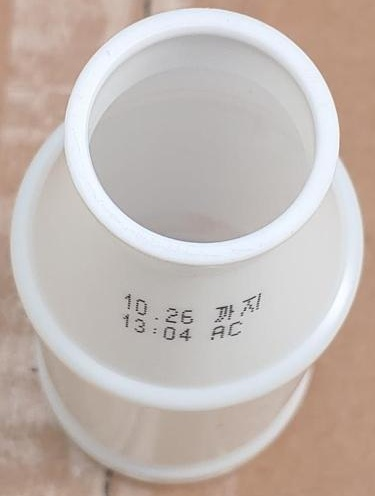

In [ ]:
img1 = Image.open('./sm_data/24_X001_C502_1021_1.jpg') 
img1

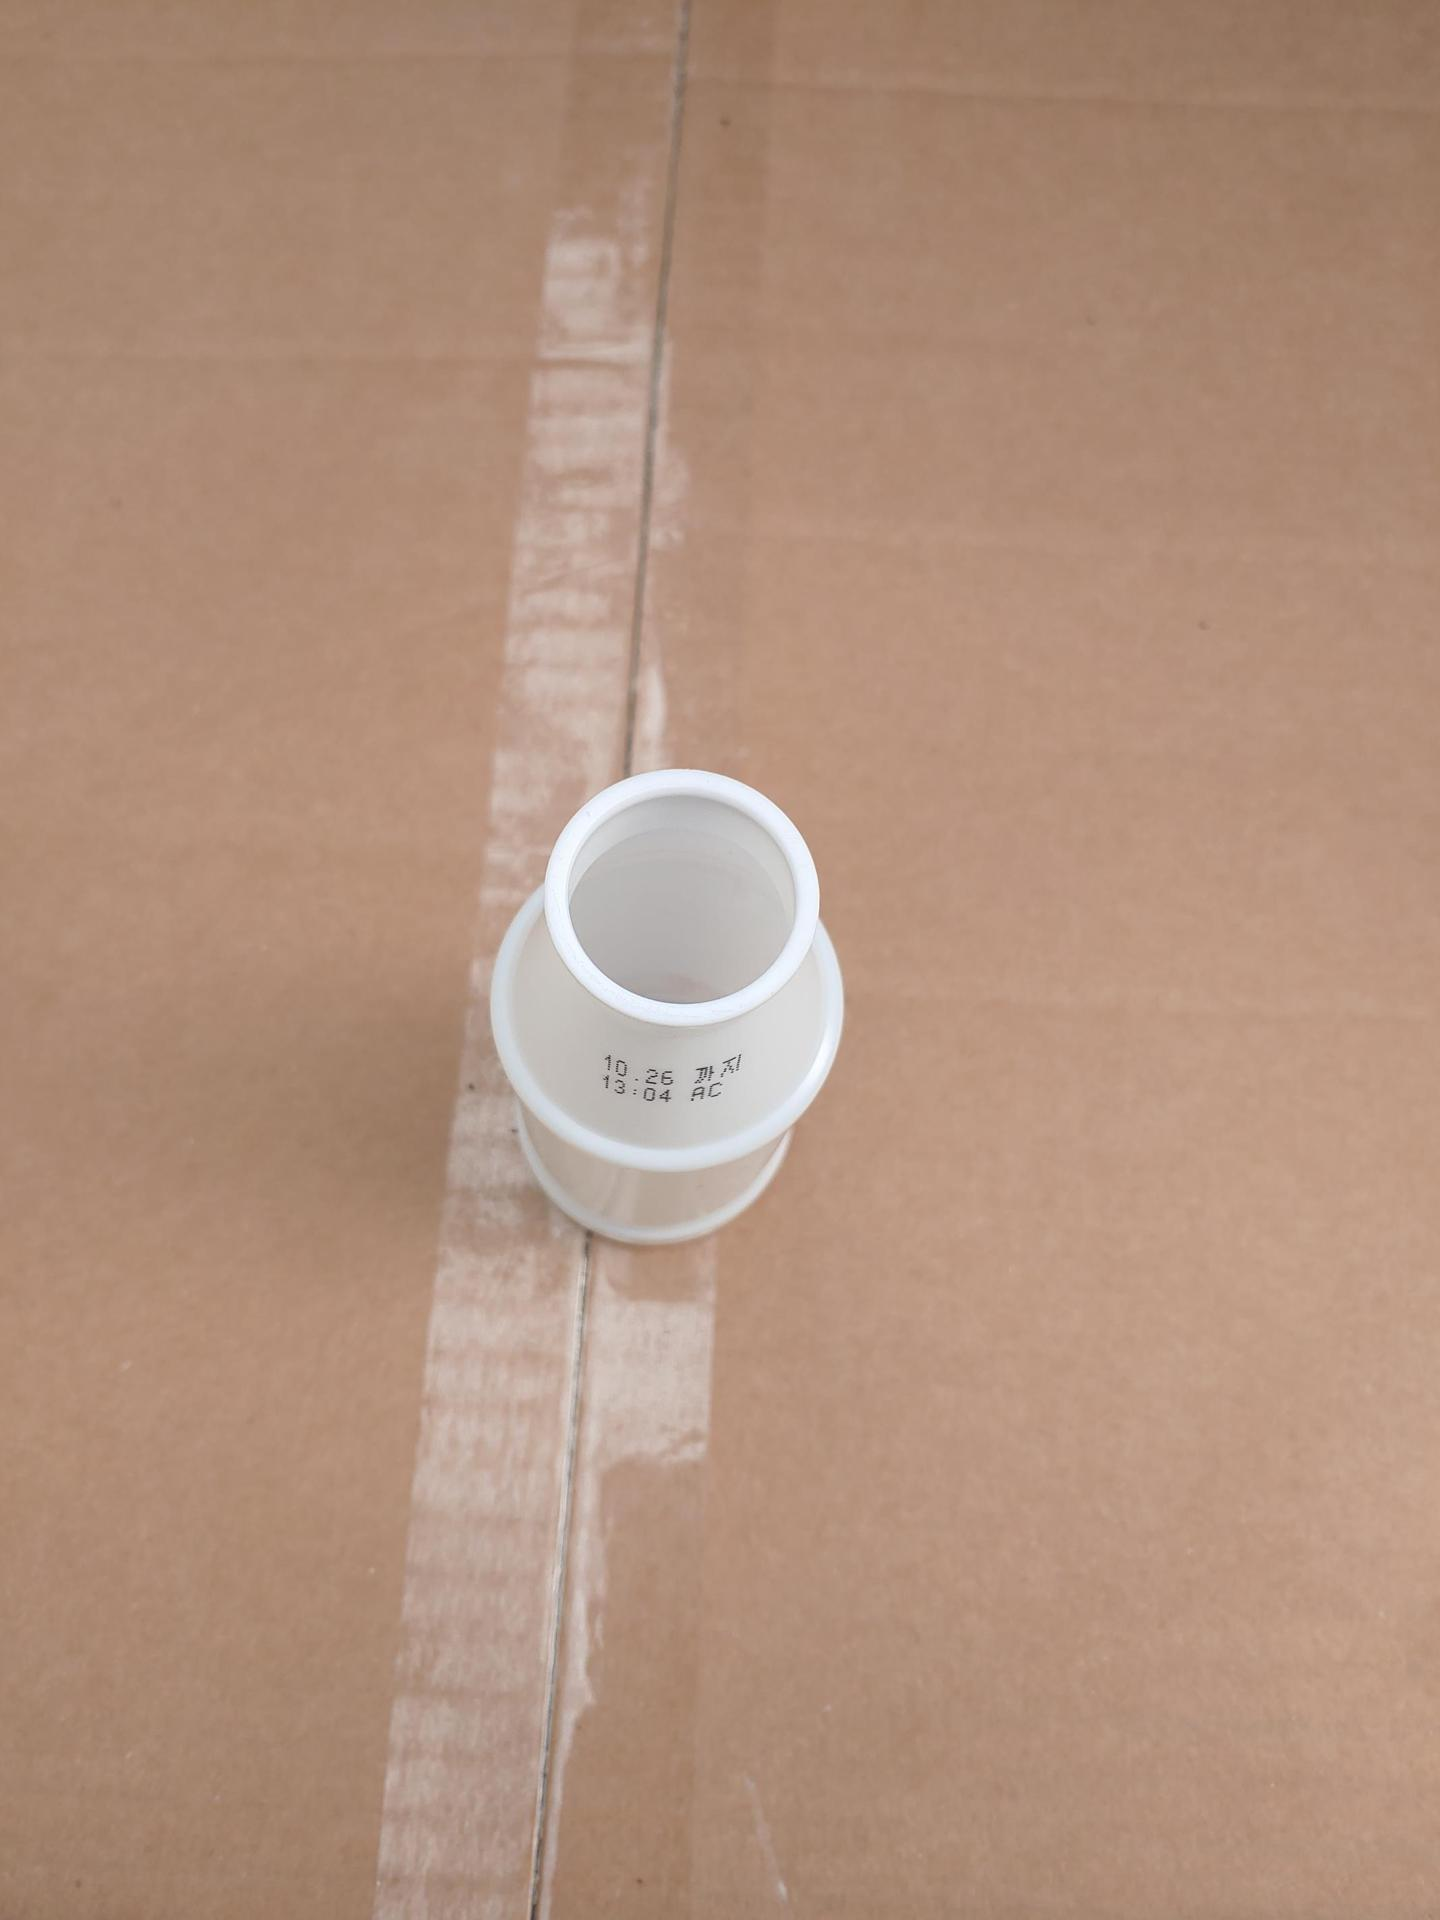

In [ ]:
# 원래 사진
img2 = Image.open('aihub_test/plastic/24_X001_C502_1021_1.jpg') 
img2

In [ ]:
import os # 동일한 경로 내에 같은 이름의 jpg 파일이 없으면 Json 파일을 삭제하는 코드

ori_path = 'aihub_test/dataset/pet/' # 경로
file_list = os.listdir(ori_path)

for i in file_list:
    if i.endswith('.Json'): 
        if os.path.exists(f'{ori_path}{i[:-5]}.jpg'):
            pass
        else:
            os.remove(f'{ori_path}{i[:-5]}.Json')
    elif i.endswith('.jpg'):                        
        if os.path.exists(f'{ori_path}{i[:-4]}.Json'):
            pass
        else:
#            os.remove(f'{ori_path}{i[:-4]}.jpg')
            pass

In [ ]:
import os # Json 파일 내 x,y 좌표 없으면 삭제?

ori_path = 'aihub_json_test/' # 경로
file_list = os.listdir(ori_path)

for i in file_list:
    if i.endswith('.Json'): 
        with open(f'{ori_path}{i}','rt',encoding='UTF8') as f:
            json_datasss = json.load(f)
            if "x1" in json_datasss['Bounding'][0]:
                pass   
            else:
                os.remove(f'{ori_path}{i}')